## Logistic Regression

<a target="_blank" href="https://animevyuh.org/logistic-regression/"> <img src="https://img.shields.io/badge/📖 Read blog post for in depth understanding in Logistic Regression-9cf"></a>

### Sigmoid Function: Logistic Regression

$ {z} = (W.T*X) + b$

$ \hat{y}= 1/(1+e^{-z}) $

### Method-1 Without Using Sklearn Library

#### Import Necessary Data

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Read the training and testing data

In [102]:
train_data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("testing_data.csv")

In [103]:
train_data.shape

(25079, 18)

In [104]:
test_data.shape

(9330, 17)

In [105]:
train_data.head(10)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,7895,51,848,dx1 dx3 dx4,20,23.438528,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
6,17785,49,6663,DX5,5,23.882432,NO,RURAL,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1
7,343,35,248,dx2,45,17.059734,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
8,11729,36,8098,dx6,43,22.182933,YES,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0
9,15319,15,10018,DX6,60,17.956259,NO,RURAL,Stable,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0


We need to predict whether the patient survived or not based on the dataset. 0=Not Survived 1=Survived

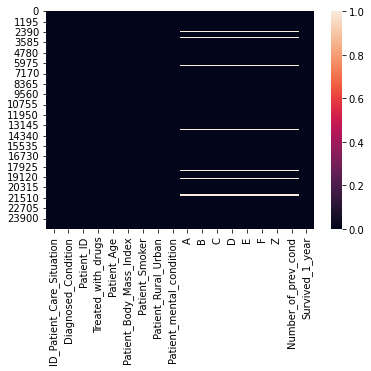

In [106]:
sns.heatmap(train_data.isnull())
plt.show()

I have already performed EDA on this dataset. But you guys can open a pull request, the EDA with best analysis will be merged 

In [107]:
features = ["Patient_Age","Patient_Body_Mass_Index","Patient_Smoker","Diagnosed_Condition","Treated_with_drugs"]

In [174]:
def clean_smoker_duplicate(word):
    if word.lower().startswith('n'):
        return "no"
    elif word.lower().startswith('y'):
        return "yes"
    else:
        return "null"

train_data['Patient_Smoker'] = train_data['Patient_Smoker'].apply(lambda word:clean_smoker_duplicate(word))

In [175]:
X = train_data[features]
Y = train_data['Survived_1_year'] 

In [176]:
Y.unique()

array([1, 0])

In [177]:
X.isnull().sum()

Patient_Age                0
Patient_Body_Mass_Index    0
Patient_Smoker             0
Diagnosed_Condition        0
Treated_with_drugs         8
dtype: int64

In [178]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_Age              25079 non-null  int64  
 1   Patient_Body_Mass_Index  25079 non-null  float64
 2   Patient_Smoker           25079 non-null  object 
 3   Diagnosed_Condition      25079 non-null  int64  
 4   Treated_with_drugs       25071 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 979.8+ KB


In [179]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_Age              25079 non-null  int64  
 1   Patient_Body_Mass_Index  25079 non-null  float64
 2   Patient_Smoker           25079 non-null  object 
 3   Diagnosed_Condition      25079 non-null  int64  
 4   Treated_with_drugs       25071 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 979.8+ KB


In [180]:
#scale and encode the numerical and categorical data types respectively.
numerical = list()
categorical = list()
for col in X.columns:
    if X[col].dtype == "O":
        categorical.append(col)
    else:
        numerical.append(col)

In [181]:
Y.shape

(25079,)

In [182]:
categorical

['Patient_Smoker', 'Treated_with_drugs']

In [183]:
X.head(3)

,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Diagnosed_Condition,Treated_with_drugs
0,60,21.655523,no,47,DX2
1,2,28.852743,no,3,DX6
2,20,26.179725,no,7,Dx6


In [184]:
from sklearn.preprocessing import LabelEncoder

enco = LabelEncoder()
for col in categorical:
    X[col] = enco.fit_transform(X[col])

In [185]:
X.sample(3)

,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Diagnosed_Condition,Treated_with_drugs
18229,18,21.637921,1,32,33
14611,24,18.750400,1,15,47
20451,6,23.598803,0,8,180


In [186]:
train_data['Patient_Smoker'].unique()

array(['no', 'yes'], dtype=object)

#### First Initialize Weights and Bias

In [187]:
def initial(dimension):
    W = np.full((dimension,1),0.01)
    b = 0.0
    return W,b

#### Sigmoid Function is the deciding activation used Logistic Regression

It is defined as:

$ \hat{y}= 1/(1+e^{-z}) $

In [188]:
def sigmoid(z):
    activation = 1 / (1+np.exp(-z))
    return activation

#### Split Train and Test Dataset

In [189]:
def train_test_split(x,y,train_size=0.8,test_size=0.2):
    train_size = int(train_size*len(x))
    # or test_size = int(test_size*len(x))
    
    size = list(range(len(x)))
    np.random.shuffle(size)
    
    X_train = x[:train_size]
    y_train = y[:train_size]
    X_test = x[train_size:]
    y_test = y[train_size:]
    
    return X_train,X_test,y_train,y_test

In [190]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.8)

In [191]:
X_train.sample(1)

,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Diagnosed_Condition,Treated_with_drugs
15933,54,27.95055,0,49,55


In [192]:
X_test.shape

(5016, 5)

In [204]:
y_train = y_train.to_numpy().reshape(-1,1)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [205]:
y_test.shape

(5016,)

In [206]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X) 

In [207]:
def loss_function(x,y,y_pred):
    m = x.shape[1]
    loss = -y*np.log(y_pred) - (1-y)*np.log(1-y_pred)
    cost = (np.sum(loss)) / m
    return loss,cost

In [208]:
def propagation(W,b,X_train,y_train):
    z = np.dot(W.T,X_train) + b
    y_pred = sigmoid(z)
    
    loss,cost = loss_function(X_train,y_train,y_pred)
    
    m = X_train.shape[1]
    dw = (np.dot(X_train,((y_pred-y_train).T)))/m
    db = np.sum(y_pred-y_train)/m
    gradients = {"dw": dw,"db": db}
    
    return cost,gradients

In [209]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    for i in range(number_of_iterarion):
        cost,gradients = propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["dw"]
        b = b - learning_rate * gradients["db"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost)) #if section defined to print our cost values in every 10 iteration. We do not need to do that. It's optional.
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [210]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is one means has diabete (y_head=1),
    # if z is smaller than 0.5, our prediction is zero means does not have diabete (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [211]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initial(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    

    # Print train/test Errors
    
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

In [ ]:
logistic_regression(X_train, y_train, X_test, y_test,learning_rate = 0.01, num_iterations = 200)